In [56]:
import pandas as pd
import numpy as np
import scipy as sc
import datetime
import matplotlib
import matplotlib.pyplot as plt
import statistics

In [51]:
data = pd.read_csv('complete_project_dataset',index_col=0)

data_2014 = data[0:269]
data_2015 = data[270:604]
data_2016 = data[605:986]
data_2017 = data[987:1332]
data_2018 = data[1333:1668]
data_2019 = data[1669:2085]

data_2017

,ID,Date,State,City/County,Address,Killed,Injured,Source
1,1017422,"December 31, 2017",Illinois,Chicago,2335 Howard St,0,4,https://chicago.suntimes.com/news/3-wounded-1-...
2,1018118,"December 31, 2017",New Jersey,Long Branch,635 Wall St,4,0,http://www.nj.com/monmouth/index.ssf/2018/01/t...
3,1015666,"December 27, 2017",Nevada,Las Vegas,3750 E Bonanza Rd,2,2,https://lasvegassun.com/news/2017/dec/28/calif...
4,1015336,"December 26, 2017",Florida,Miami,NW 18th Ave and 86th Ter,0,5,http://wsvn.com/news/local/5-hospitalized-afte...
5,1013983,"December 24, 2017",Mississippi,Vicksburg,1111 Mulberry Street,0,5,http://deltadailynews.com/downtown-vicksburg-s...
...,...,...,...,...,...,...,...,...
341,742542,"January 4, 2017",California,Fontana,14520 Village Drive,3,1,http://www.fresnobee.com/news/local/crime/arti...
342,742001,"January 3, 2017",Texas,Allen,500 block of Hawthorne Drive,0,4,http://www.star-telegram.com/news/local/crime/...
343,743282,"January 1, 2017",Mississippi,Winstonville,114 North Greyer Street,0,5,http://www.bolivarcommercial.com/newsx/item/54...
344,739451,"January 1, 2017",Texas,Dallas,9220 Skillman Street,1,3,http://www.wfaa.com/news/local/second-death-by...


In [45]:
dates = []
num_killed = []
num_injured = []

for row in range(len(data)):
    x = datetime.datetime.strptime(data.iloc[row,1],"%B %d, %Y")
    if x in dates:
        num_killed[len(num_killed)-1]+= data.iloc[row,5]
        num_injured[len(num_injured)-1]+= data.iloc[row,6]
    else:
        dates.append(x)
        num_killed.append(data.iloc[row,5])
        num_injured.append(data.iloc[row,6])


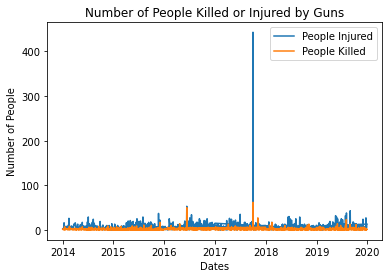

In [52]:

plt.plot(dates, num_injured, label = "People Injured")
plt.plot(dates, num_killed, label = "People Killed")

# naming the x axis
plt.xlabel('Dates')
# naming the y axis
plt.ylabel('Number of People')
# giving a title to my graph
plt.title('Number of People Killed or Injured by Guns')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

In [71]:
d = {'statistic' : ['mean','median','mode','std','min','max'], 
     'Number Killed' : [np.mean(num_killed),np.median(num_killed),statistics.mode(num_killed),np.std(num_killed),min(num_killed),max(num_killed)],
    'Number Injured' : [np.mean(num_injured),np.median(num_injured),statistics.mode(num_injured),np.std(num_injured),min(num_injured),max(num_injured)]
    }

stats_of_the_data = pd.DataFrame(data = d)
print(stats_of_the_data)


  statistic  Number Killed  Number Injured
0      mean       1.952736        7.290216
1    median       1.000000        5.000000
2      mode       0.000000        4.000000
3       std       3.285768       13.786708
4       min       0.000000        0.000000
5       max      62.000000      443.000000
